# Capstone2

In [1]:
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.insert(0, '../src')
import helpers as h
import score_metrics as sm
import score_costs as sc
import eda_plots as ep
import smote_tuning as st
import feature_engineering as ef

import score_metrics as sm
import score_costs as sc
import smote_tuning as st

In [2]:
X_train, X_test, \
y_train, y_test, \
c_train, c_test, \
X_holdout, y_holdout, c_holdout, \
features = h.load_data(4, engineered_features=True)

In [3]:
# classifiers = h.initialize_classifier_dict()
classifiers = h.load_classifier_dict("classifiers_ver03.pickle")
# clf_lst = [clf for clf in classifiers]
# classifiers = ef.add_ef_classifiers_to_dict(["RF", "XGB", "LR"], classifiers)
clf_lst = ["RF_ef", "XGB_ef", "LR_ef"]

In [4]:
# sm.score_classifiers(clf_lst, classifiers, X_train, y_train, X_test, y_test)
# h.save_classifier_dict(classifiers, version="03")

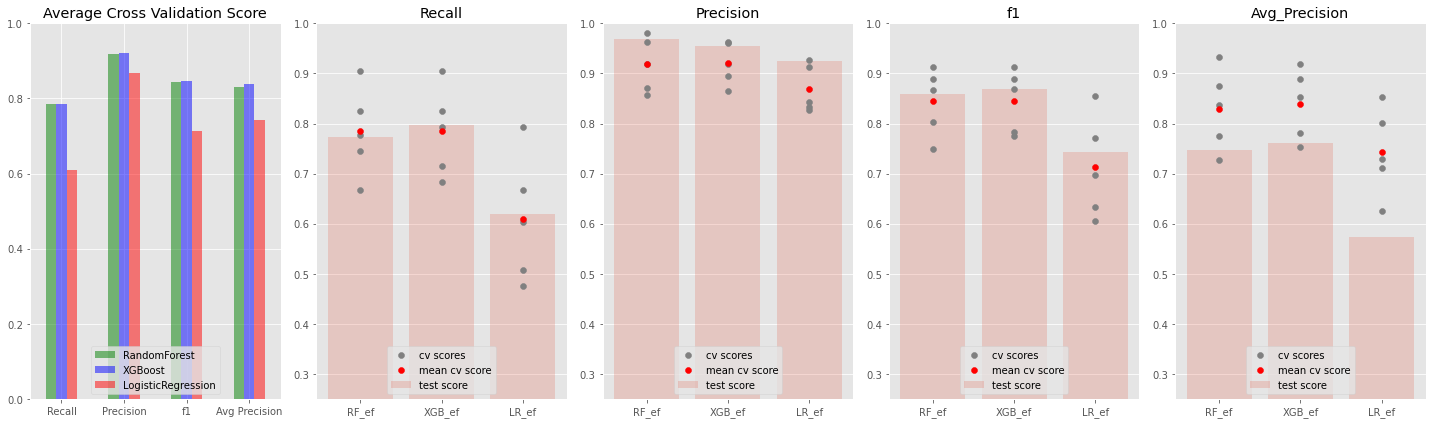

In [5]:
fig = sm.plot_all_metrics(clf_lst, classifiers)
plt.show()

In [6]:
# Business Parameters:
FraudBudget=0.0005
ReviewCost=10
ChargebackFee=20


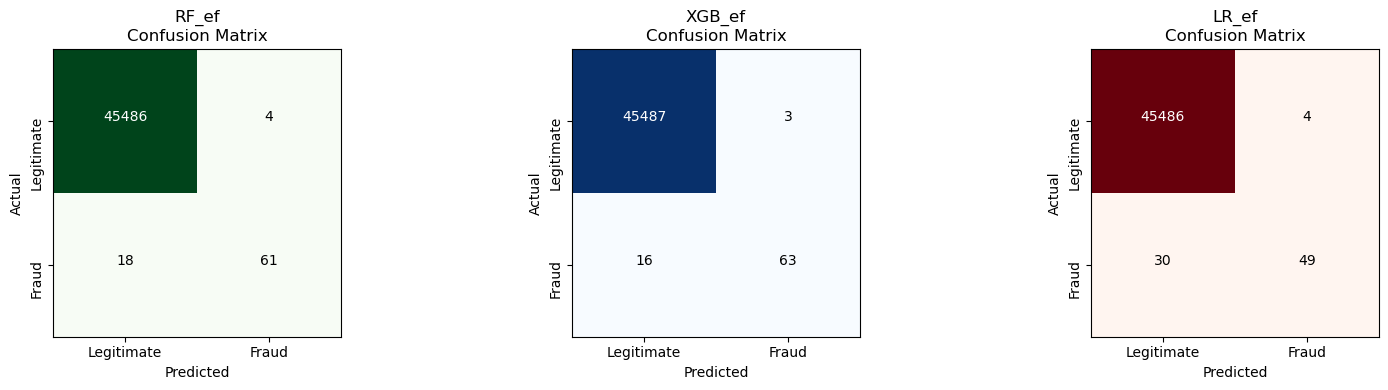

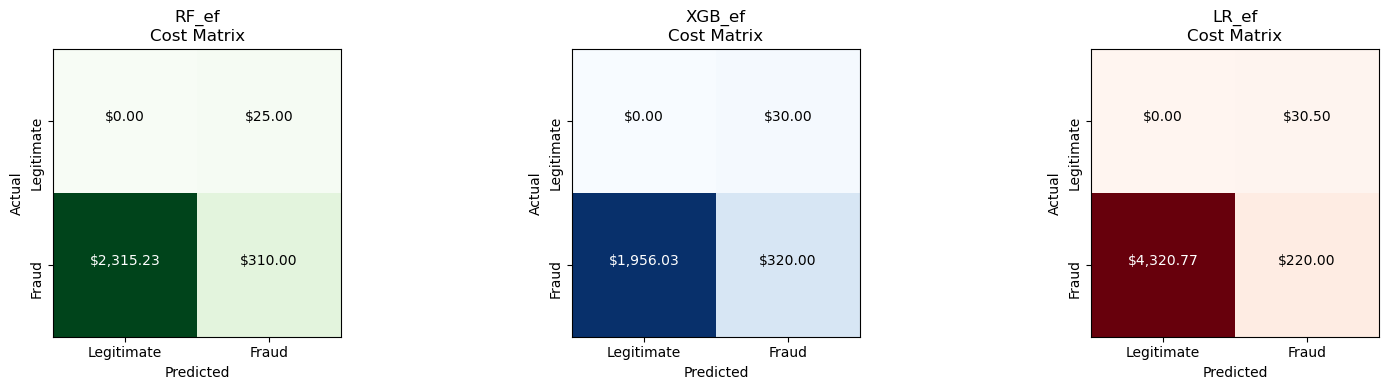

In [7]:

cost_matrix = sc.partial_review(c_test, ReviewCost, ChargebackFee)
sc.class_probabilities(clf_lst, classifiers, X_test, y_test, cost_matrix=cost_matrix)

sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=False)
sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=True)

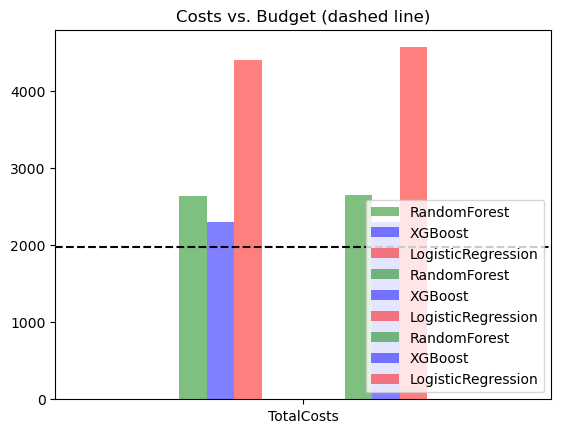

In [8]:
fig, ax = plt.subplots()
sc.plot_total_cost(ax, clf_lst, classifiers, c_test, y_test)

In [9]:
classifiers = st.add_smote_classifiers_to_dict(clf_lst, classifiers)

In [10]:
classifiers

{'RF': {'clf_desc': 'RandomForest',
  'model': RandomForestClassifier(n_jobs=-1, random_state=123),
  'c': 'g',
  'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x7f857b673f50>,
  'threshold': 0.5,
  'pipeline': Pipeline(steps=[('Classifier',
                   RandomForestClassifier(n_jobs=-1, random_state=123))]),
  'cv_Avg_Precision_scores': array([0.934199  , 0.88449047, 0.83652476, 0.77200225, 0.70830797]),
  'cv_Recall_scores': array([0.9047619 , 0.82539683, 0.74603175, 0.73015873, 0.66666667]),
  'cv_Precision_scores': array([0.9047619 , 1.        , 0.97916667, 0.86792453, 0.93333333]),
  'cv_f1_scores': array([0.9047619 , 0.90434783, 0.84684685, 0.79310345, 0.77777778]),
  'cvAvg_Avg_Precision_score': 0.8271048922841935,
  'cvAvg_Recall_score': 0.7746031746031746,
  'cvAvg_Precision_score': 0.9370372866127583,
  'cvAvg_f1_score': 0.8453675607498697,
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'test_Avg_Precision_score': 0.7376189371197082,
  'test_Recall_score': 0.7848

### Voting Classifier Analysis

In [11]:
# classifiers = sm.create_voting_classifier(clf_lst, classifiers, X_train, y_train)
# clf_lst.append("Voting")

In [12]:
# cost_matrix = sc.partial_review(c_test, ReviewCost, ChargebackFee)
# sc.class_probabilities(clf_lst, classifiers, X_test, y_test, cost_matrix=cost_matrix)

# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=False)
# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=True)

# fig, ax = plt.subplots()
# sc.plot_total_cost(ax, clf_lst, classifiers, c_test, y_test)

In [13]:
# evaluate fitted model on holdout data
# this will overwrite the classifier cost fields.


# cost_matrix = sc.partial_review(c_holdout, ReviewCost, ChargebackFee)
# sc.class_probabilities(clf_lst, classifiers, X_holdout, y_holdout, cost_matrix=cost_matrix)

# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=False)
# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=True)
# fig, ax = plt.subplots()
# sc.plot_total_cost(ax, clf_lst, classifiers, c_holdout, y_holdout)